# Proyek Analisis Data:   Bike Sharing Dataset
- **Nama:** Ida Sri Afiqah
- **Email:** idaafiqaa@student.ub.ac.id
- **ID Dicoding:** fikaaw

# Keterangan Dataset

In [1]:
readme = "/content/Readme.txt"

In [3]:
with open(readme, "r") as file:
    isi_file = file.read()
    print(isi_file)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah pengguna baru dengan pengguna casual dalam beberapa tahun terakhir?
- Bagaimana pola pada jumlah total penyewaan sepeda pada bulan dan tahun?
- Bagaimana perbandingan jumlah penyewaan sepeda pada saat hari kerja dengan hari libur ?
- Bagaiamana Pola Peminjaman sepeda per Jam dan Hari
- Bagaimana efek musim terhadap jumlah total penyewaan sepeda ?
- Bagaimana efek cuaca terhadap jumlah total penyewaan sepeda ?
- Distribusi penyewaan per Musim dan Cuaca
- Faktor lingkungan apa saja yang dapat mempengaruhi jumlah penyewaan sepeda gunakan regresi dalam menganalisis hubungan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv("/content/day.csv")
day_df.head()

: 

In [6]:
hour_df = pd.read_csv("/content/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Dataset Information

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**

- Pada dataframe day_df memiliki 16 feature atau column dan 731 nilai non-null dalam tiap feature-feature yang ada.
- Feature yang memiliki tipe data int64 sebanyak 11 sedangkan dengan feature yang memiliki tipe data float64 sebanyak 4.
- Pada feature dteday terjadi kesalahan tipe data karena tertera tipe datanya object yang harus dirubah menjadi datetime64

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**

- Pada dataframe hour_df memiliki 17 feature atau column dan 17379 nilai non-null dalam setiap feature-feature yang ada.
- Feature yang memiliki tipe data int64 sebanyak 12 sedangkan dengan feature yang memiliki tipe data float64 sebanyak 4.
- Pada feature dteday terjadi kesalahan tipe data karena tertera tipe datanya object yang harus dirubah menjadi datetime64

#### Checking Missing Value

In [9]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
Tidak Terdapat Missing Value pada kedua dataframe yang ada

#### Statistic Description

In [13]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Insight:**

- pada feature "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data maka dari itu data yang ditampilkan rangenya tidak sesuai dengan kenyataan yang ada.
- Pada feature "season", "yr", dan "weathersit" telah mengalami label encoding sedangkan feature "holiday" dan "workingday" nilainya boolean.
- Kesimpulannya Tidak terdapatnya keanehan dalam ringkasan parameter statistik dari day_df setiap fitur tertampil normal sesuai jika ditinjau juga dari data characteristic pada file readme yang ada.

In [14]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**

- pada feature "temp", "atemp", "hum", "windspeed" telah mengalami normalisasi data maka dari itu data yang ditampilkan rangenya tidak sesuai dengan kenyataan yang ada.
- Pada feature "season", "yr", dan "weathersit" telah mengalami label encoding sedangkan feature "holiday" dan "workingday" nilainya boolean (0/1).
- Kesimpulannya Tidak terdapatnya keanehan dalam ringkasan parameter statistik dari hour_df setiap fitur tertampil normal sesuai jika ditinjau juga dari data characteristic pada file readme yang ada.

### Cleaning Data

In [15]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [17]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- dteday pada dataset day_df dan hour_df telah dibuat menjadi tipe data datetime

## Exploratory Data Analysis (EDA)

### Exploration on the "day_df"

1. Correlation Matrix

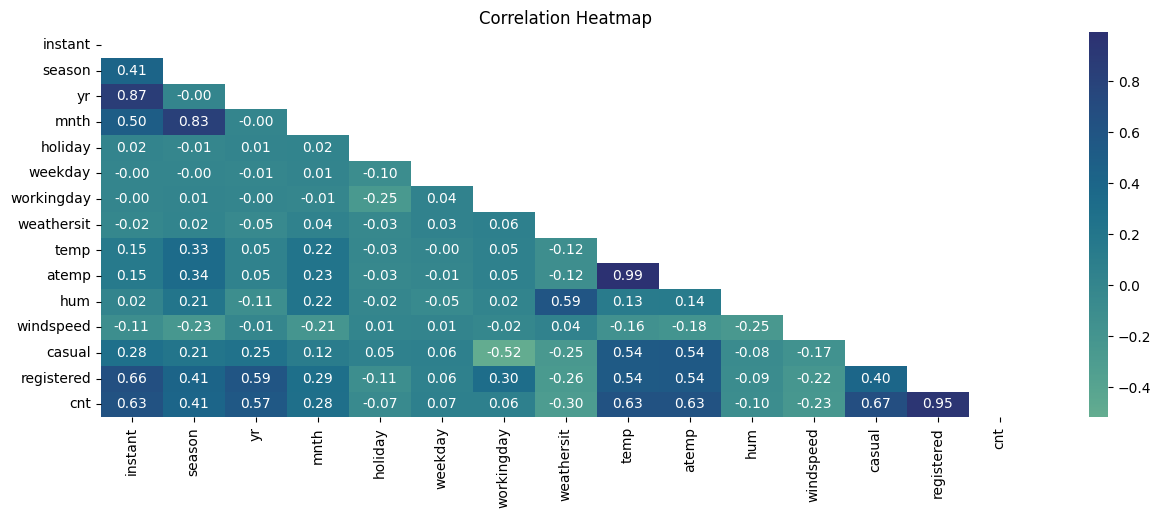

In [18]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="crest", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
1. berikut fitur yang memiliki korelasi positive yang kuat yaitu
    - "temp" dengan "atemp"
    - "cnt" dengan "registered"
    - "instant" dengan "yr"
    - "season" dengan "mnth"
2. fitur yang memiliki korelasi yang kuat dengan total sepeda sewa termasuk baik yang sewa harian maupun yang terdaftar ("cnt") yaitu
    - "registered"
    - "casual"
    - "atemp"
    - "temp"
    - "instant"
3. Semakin warnanya membiru berati antar kedua fitur tersebut tidak memiliki relasi

2. Data Distibution

In [19]:
day_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Not Holiday", 1: "Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

# Proses Decoding pada Feature yang telah terjadi proses Encoding

Proses encoding tidak dilakukan karena 1 label memiliki bermacam-macam value.

In [20]:
daily_categorical_data = day_df[["season","yr","holiday","workingday","weekday","weathersit"]]

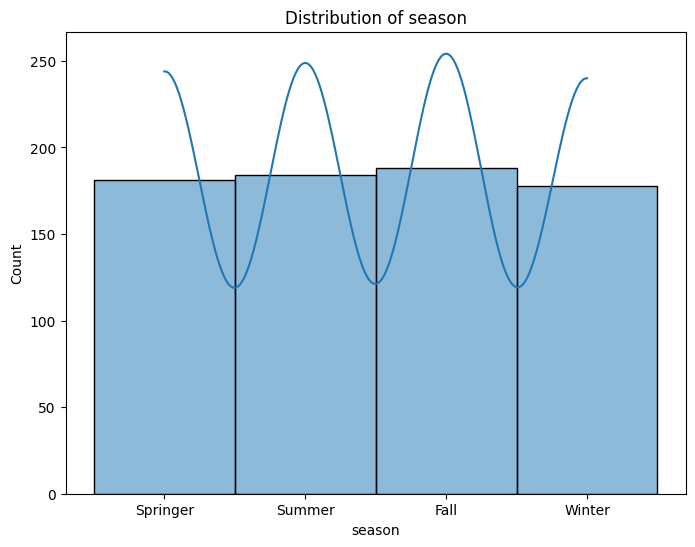

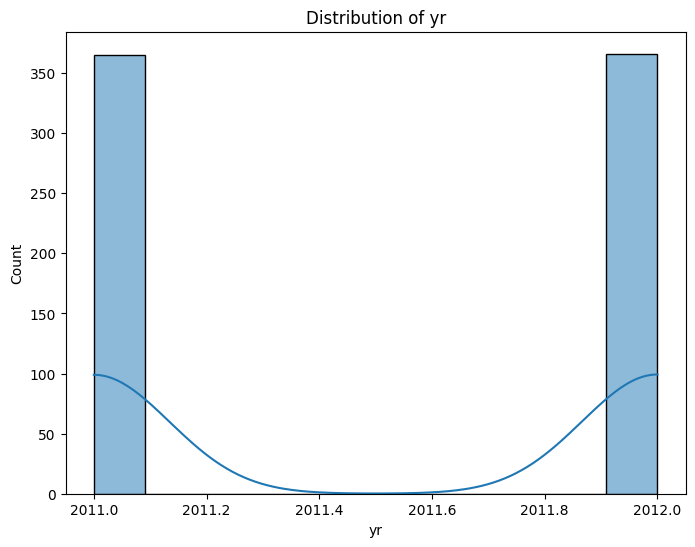

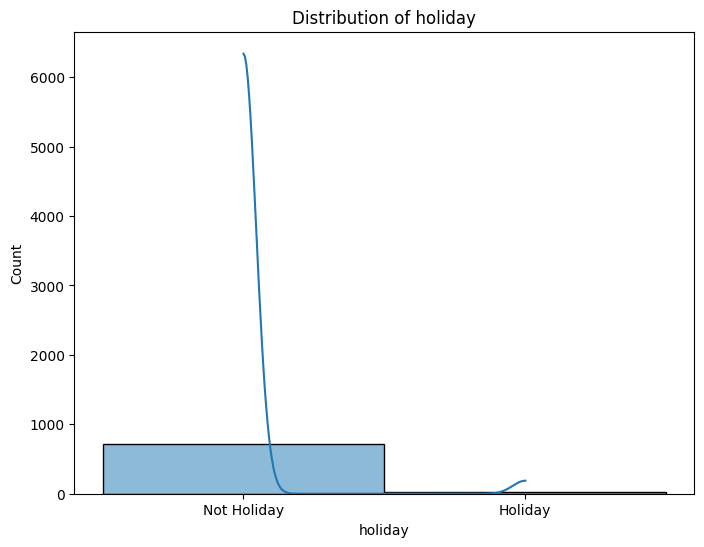

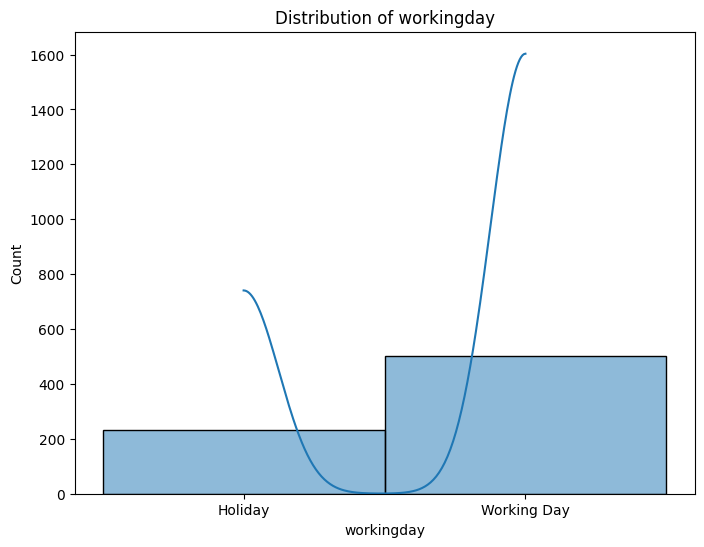

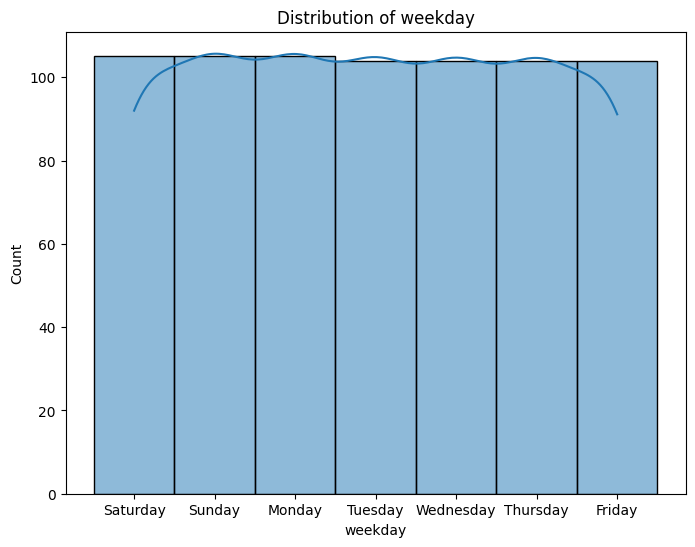

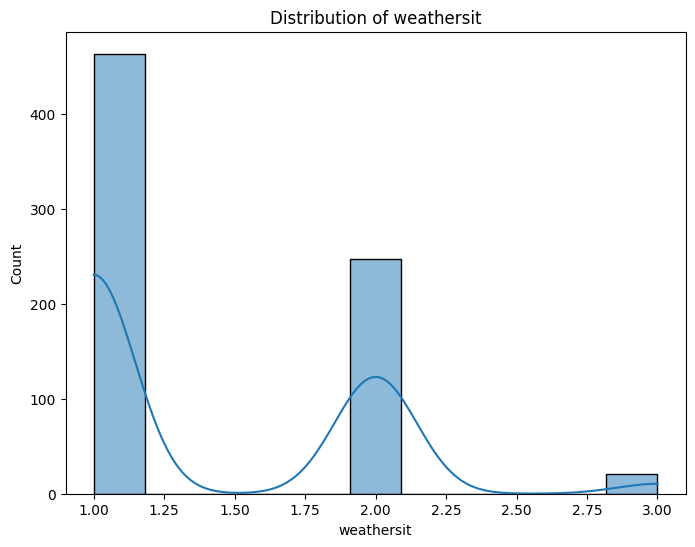

In [21]:
for column in daily_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

**Insight:**
- Feature Holiday memiliki bentuk histogram yang Right Skewed Distribution
- Feature Workingday memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Right Skewed Distribution
- Selain feature diatas diidentifikasi no skew Distribution

In [22]:
day_df["temp"] = day_df["temp"].multiply(41)
day_df["atemp"] = day_df["atemp"].multiply(50)
day_df["hum"] = day_df["hum"].multiply(100)
day_df["windspeed"] = day_df["windspeed"].multiply(67)

# # Proses Denormalisasi pada Feature yang telah terjadi proses Normalisasi

In [23]:
daily_num_data = day_df[["temp","atemp","hum","windspeed"]]

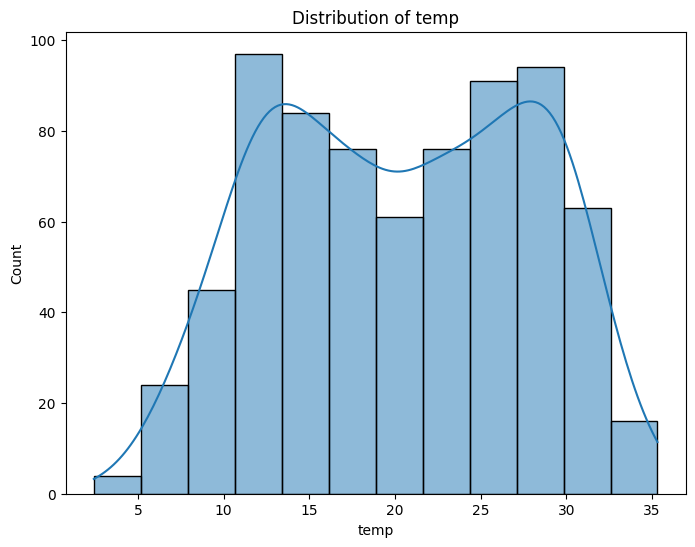

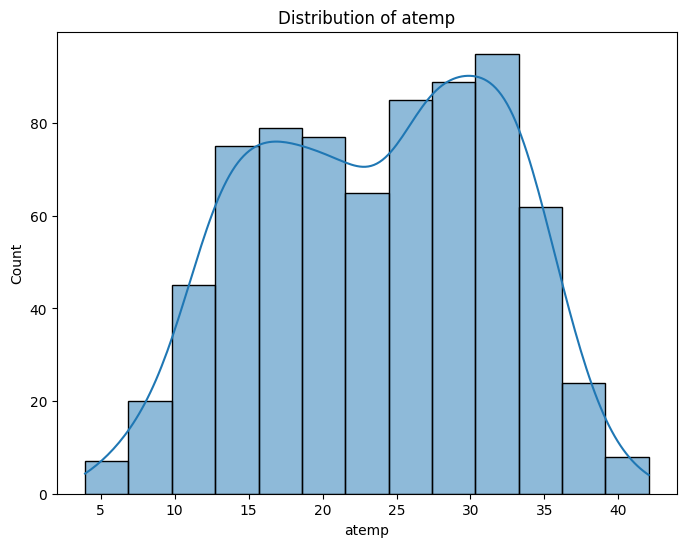

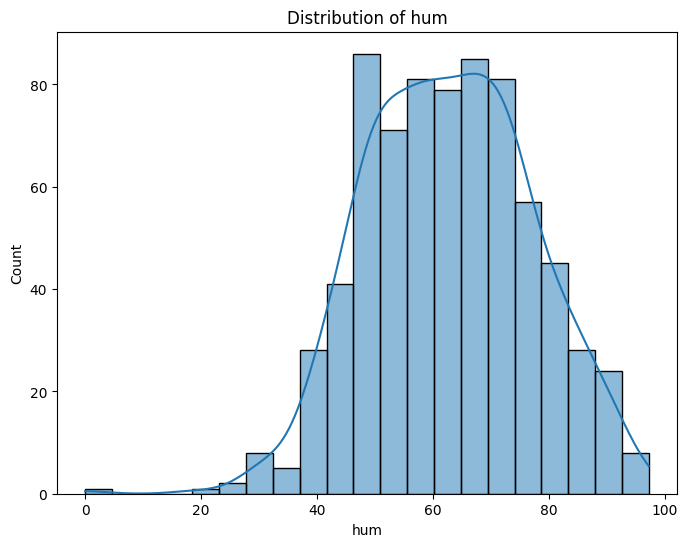

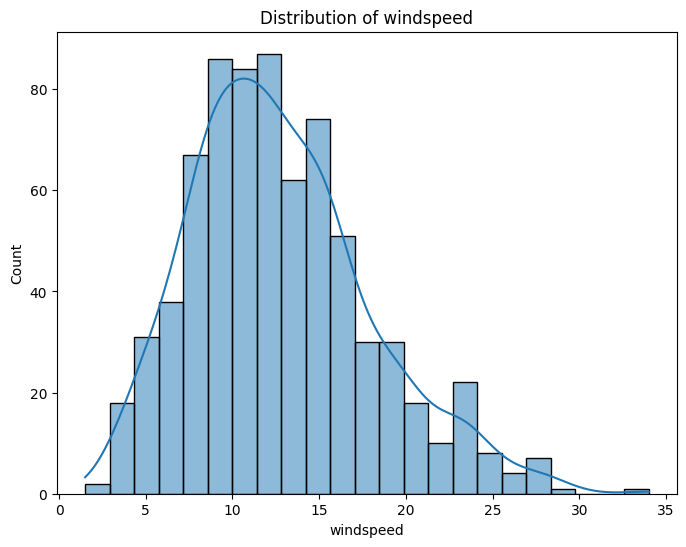

In [24]:
for column in daily_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(daily_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

**Insight:**

- Feature temp memiliki bentuk histogram yang Left Skewed Distribution
- Feature atemp memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Left Skewed Distribution
- Feature windspeed memiliki bentuk histogram yang Right Skewed Distribution

### Exploration on the "hour_df"

1. Correlation Matrix

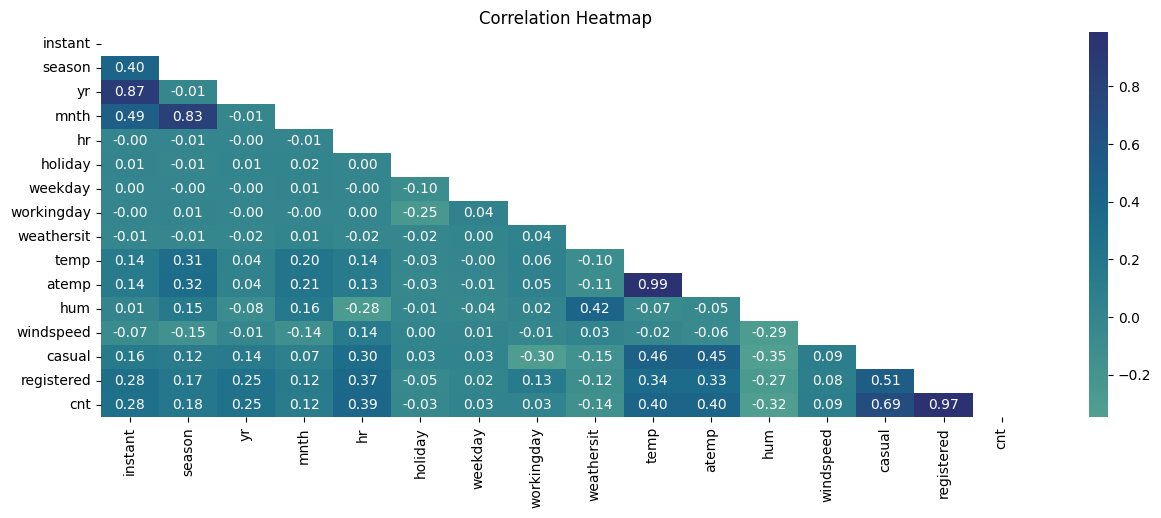

In [25]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = hour_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap="crest", center=0, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Insight:**
1. berikut fitur yang memiliki korelasi positive yang kuat yaitu
    - "temp" dengan "atemp"
    - "cnt" dengan "registered"
    - "instant" dengan "yr"
    - "season" dengan "mnth"
2. fitur yang memiliki korelasi yang kuat dengan total sepeda sewa termasuk baik yang sewa harian maupun yang terdaftar ("cnt") yaitu
    - "registered"
    - "casual"
3. Semakin warnanya membiru berati antar kedua fitur tersebut tidak memiliki relasi

2. Data Distribution

In [26]:
hour_df.replace({
    "season": {1: "Springer", 2: "Summer", 3: "Fall", 4: "Winter"},
    "yr": {0: 2011, 1: 2012},
    "holiday": {0: "Holiday", 1: "Not Holiday"},
    "workingday": {0: "Holiday", 1: "Working Day"},
    "weekday": {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
    }, inplace=True)

Proses encoding tidak dilakukan karena 1 label memiliki bermacam-macam value.

In [27]:
hour_categorical_data = hour_df[["season","yr","holiday","workingday","weekday","weathersit"]]

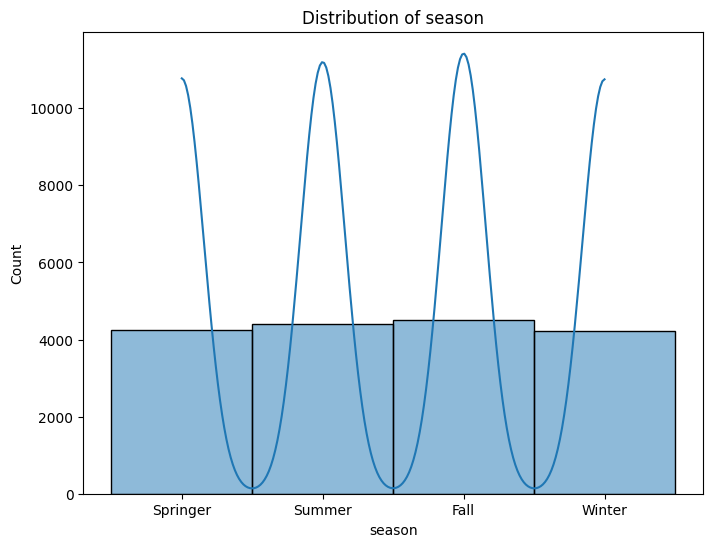

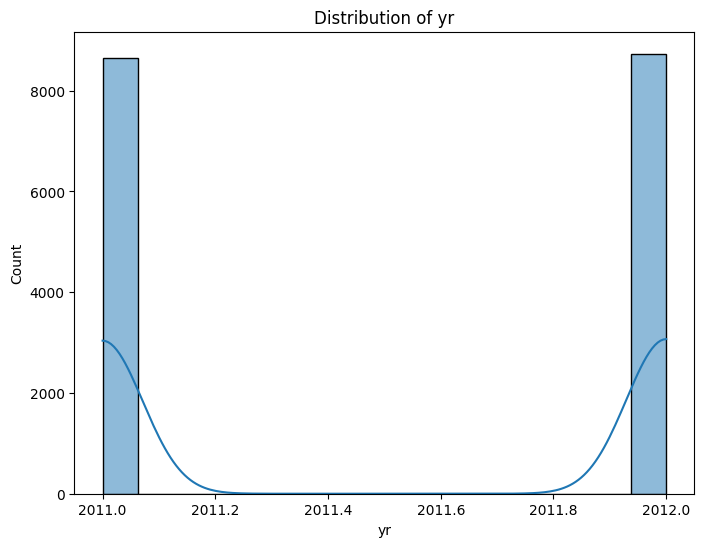

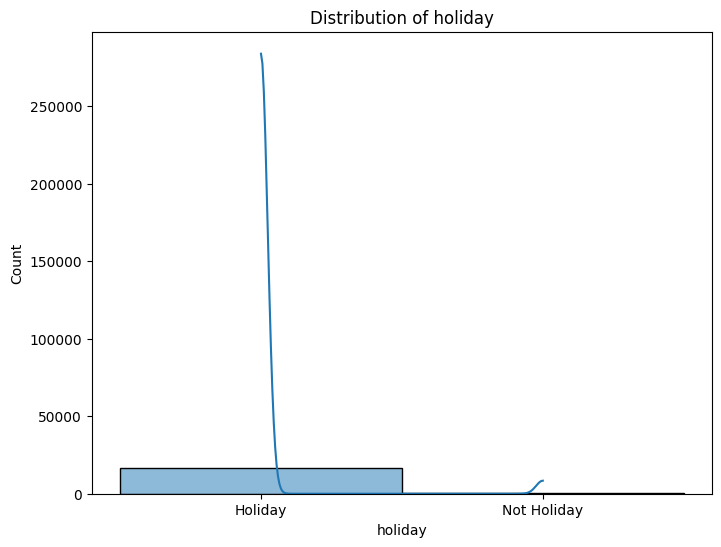

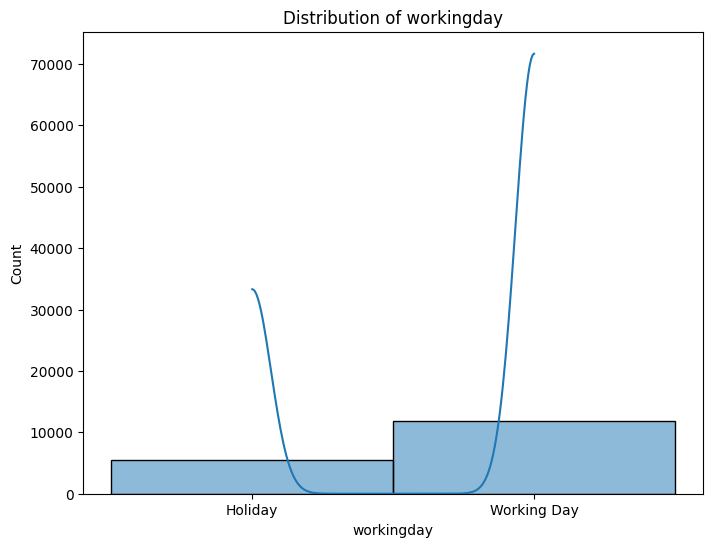

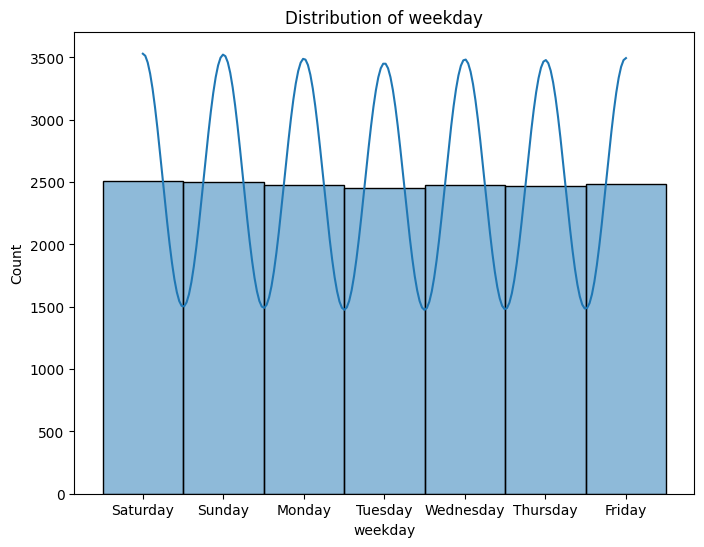

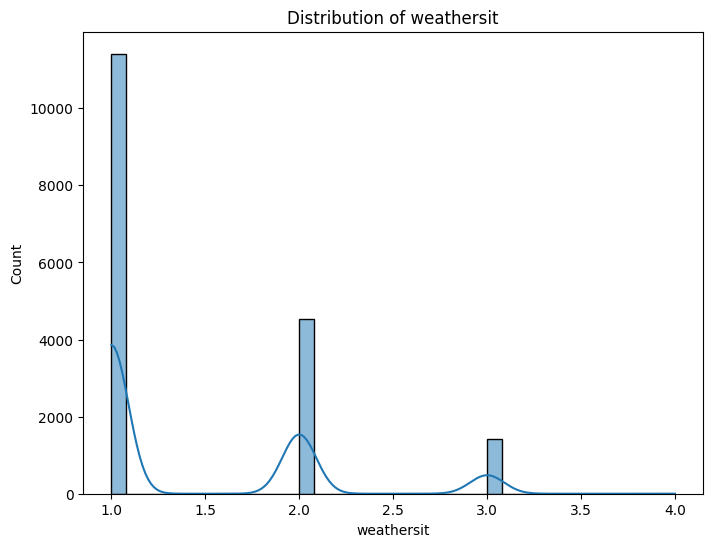

In [28]:
for column in hour_categorical_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(hour_categorical_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

**Insight:**                             
- Feature Holiday memiliki bentuk histogram yang Right Skewed Distribution
- Feature Workingday memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Right Skewed Distribution
- Selain feature diatas diidentifikasi no skew Distribution

In [29]:
hour_df["temp"] = hour_df["temp"].multiply(41)
hour_df["atemp"] = hour_df["atemp"].multiply(50)
hour_df["hum"] = hour_df["hum"].multiply(100)
hour_df["windspeed"] = hour_df["windspeed"].multiply(67)

In [30]:
hour_num_data = hour_df[["temp","atemp","hum","windspeed"]]

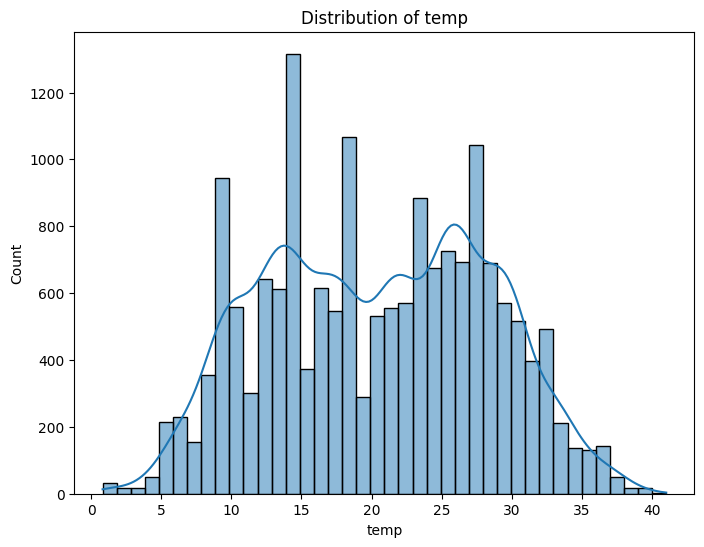

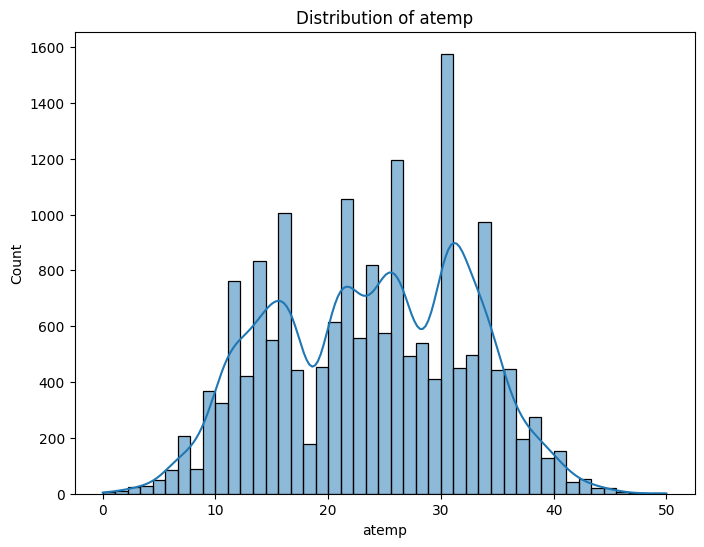

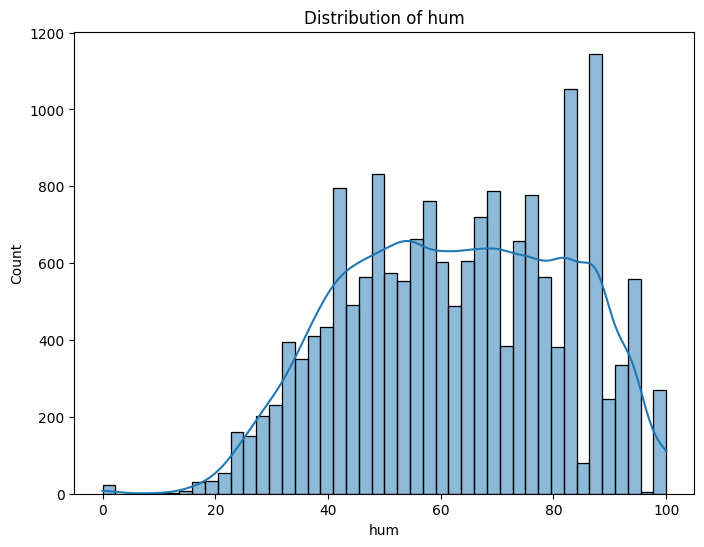

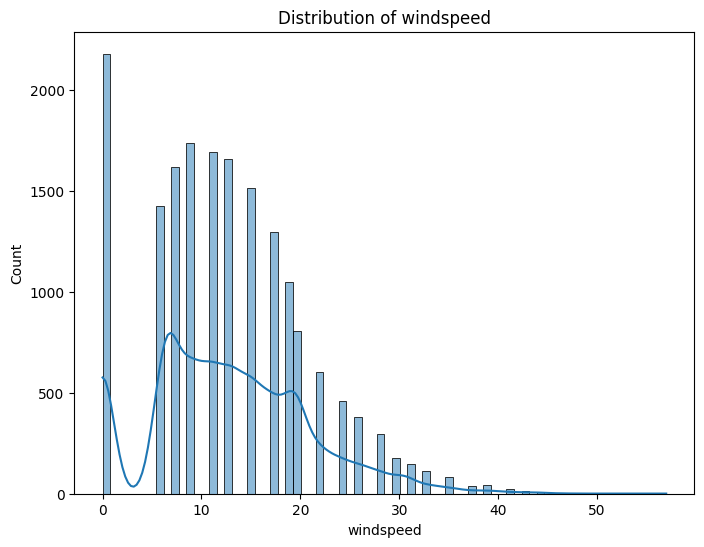

In [31]:
for column in hour_num_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=hour_num_data, x=column, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

**Insight**:
- Feature temp memiliki bentuk histogram yang Left Skewed Distribution
- Feature atemp memiliki bentuk histogram yang Left Skewed Distribution
- Feature Weathersit memiliki bentuk histogram yang Left Skewed Distribution
- Feature windspeed memiliki bentuk histogram yang Right Skewed Distribution

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren jumlah pengguna baru dengan pengguna casual dalam beberapa tahun terakhir?

In [32]:
casual_year_counts = day_df.groupby("yr")["casual"].sum()
casual_year_counts = casual_year_counts.reset_index()
casual_year_counts.columns = ["yr", "total_casual"]

In [33]:
casual_year_counts

,yr,total_casual
0,2011,247252
1,2012,372765


In [34]:
reg_year_counts = day_df.groupby("yr")["registered"].sum()
reg_year_counts = reg_year_counts.reset_index()
reg_year_counts.columns = ["yr", "total_registered"]

In [35]:
reg_year_counts

,yr,total_registered
0,2011,995851
1,2012,1676811


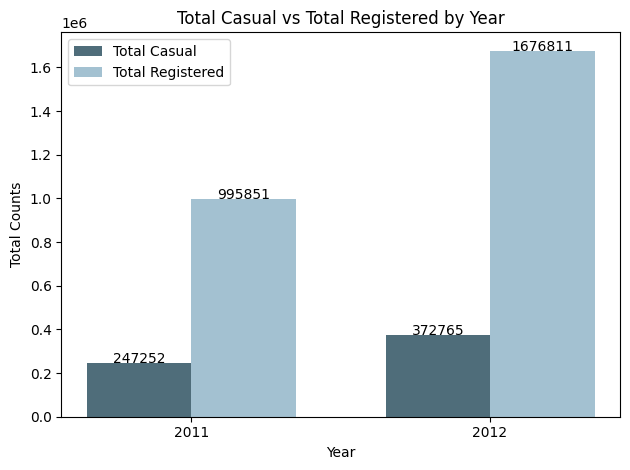

In [36]:
import matplotlib.pyplot as plt

index = casual_year_counts["yr"]
bar_width = 0.35

# Set the colors to pastel dark blue and pastel light blue
p1 = plt.bar(index, casual_year_counts["total_casual"], bar_width, label="Total Casual", color="#4F6D7A")  # Pastel Dark Blue
p2 = plt.bar(index + bar_width, reg_year_counts["total_registered"], bar_width, label="Total Registered", color="#A3C1D1")  # Pastel Light Blue

plt.xlabel("Year")
plt.ylabel("Total Counts")
plt.title("Total Casual vs Total Registered by Year")
plt.xticks(index + bar_width / 2, casual_year_counts["yr"])
plt.legend()

# Add labels above each bar
for p in p1 + p2:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 1, str(int(height)), ha="center")

plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana pola pada jumlah total penyewaan sepeda pada bulan dan tahun?

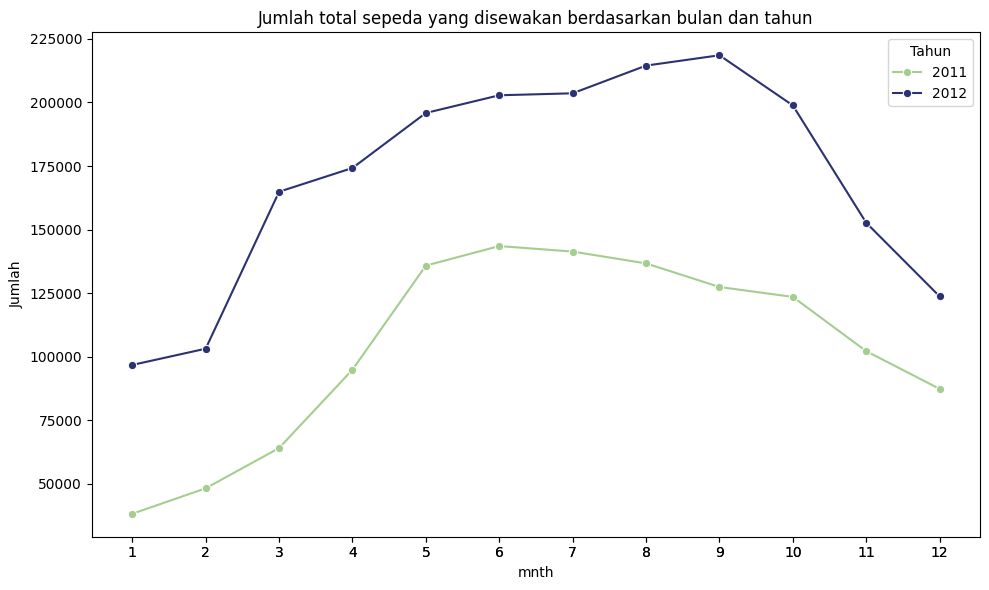

In [37]:
monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_counts, x="mnth", y="cnt", hue="yr", palette="crest", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan bulan dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=monthly_counts["mnth"], labels=monthly_counts["mnth"])
plt.tight_layout()
plt.show()

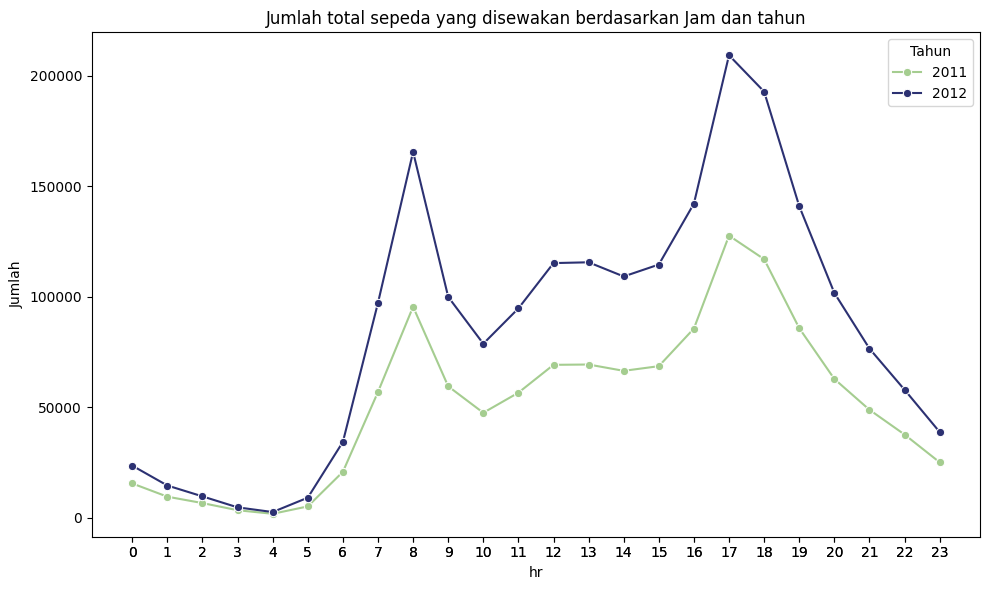

In [38]:
hourly_counts = hour_df.groupby(by=["hr","yr"]).agg({
    "cnt": "sum"
}).reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_counts, x="hr", y="cnt", hue="yr", palette="crest", marker="o")

plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan Jam dan tahun")
plt.legend(title="Tahun", loc="upper right")
plt.xticks(ticks=hourly_counts["hr"], labels=hourly_counts["hr"])
plt.tight_layout()
plt.show()

### Pertanyaan 3: Bagaimana perbandingan jumlah penyewaan sepeda pada saat hari kerja dengan hari libur ?

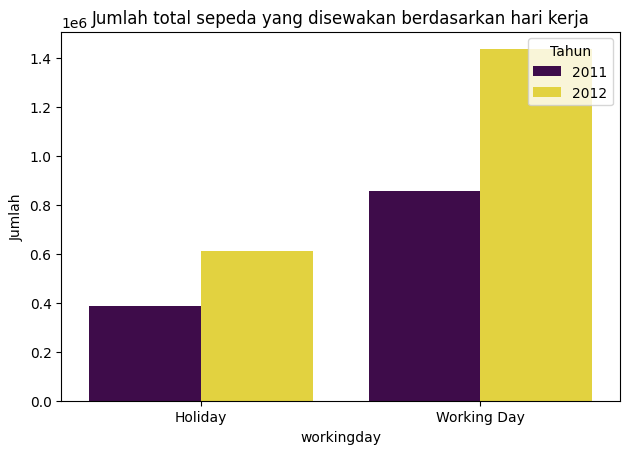

In [39]:
working_counts = day_df.groupby(by=["workingday","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=working_counts, x="workingday", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan hari kerja")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana  Pola peminjaman sepeda per Jam dan Hari?

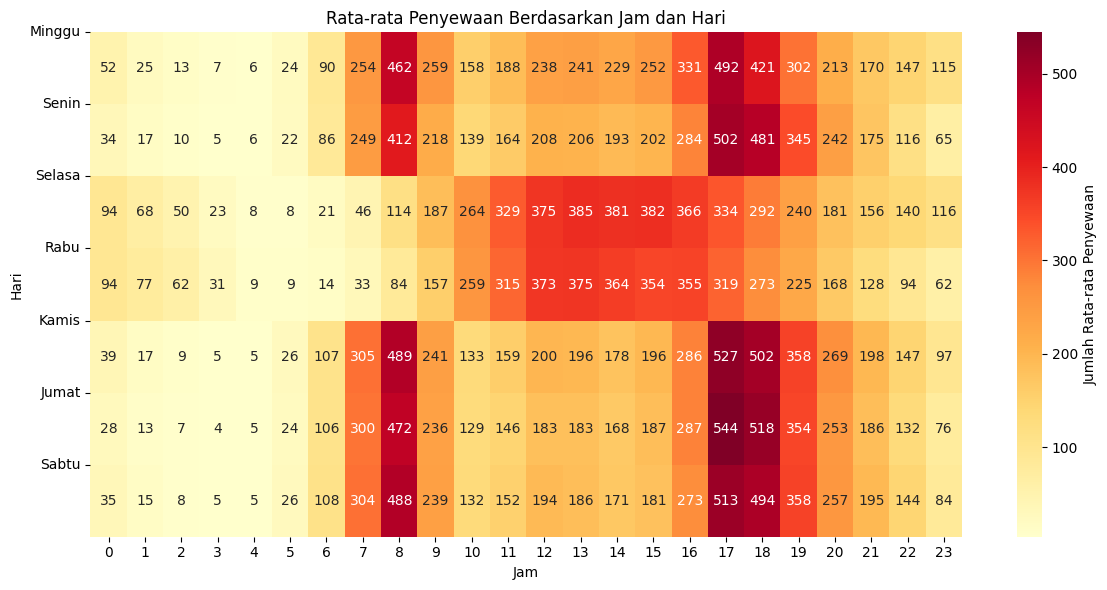


Keterangan Hari:
0: Minggu
1: Senin
2: Selasa
3: Rabu
4: Kamis
5: Jumat
6: Sabtu


In [42]:
# Fungsi untuk membuat heatmap data
def create_hourly_weekday_heatmap(hour_df):
    heatmap_df = hour_df.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()
    heatmap_df = heatmap_df.pivot(index='weekday', columns='hr', values='cnt')
    return heatmap_df

# Buat heatmap
plt.figure(figsize=(12, 6))
heatmap_data = create_hourly_weekday_heatmap(hour_df)  # Menggunakan hour_df

# Buat heatmap dengan seaborn
sns.heatmap(heatmap_data,
            cmap='YlOrRd',
            annot=True,
            fmt='.0f',
            cbar_kws={'label': 'Jumlah Rata-rata Penyewaan'})

plt.title('Rata-rata Penyewaan Berdasarkan Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Hari')

# Tambahkan keterangan hari
plt.yticks(range(7), ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])

# Tampilkan plot
plt.tight_layout()
plt.show()

# Tampilkan keterangan
print("\nKeterangan Hari:")
print("0: Minggu")
print("1: Senin")
print("2: Selasa")
print("3: Rabu")
print("4: Kamis")
print("5: Jumat")
print("6: Sabtu")

### Pertanyaan 5: Bagaimana efek musim terhadap jumlah total penyewaan sepeda ?

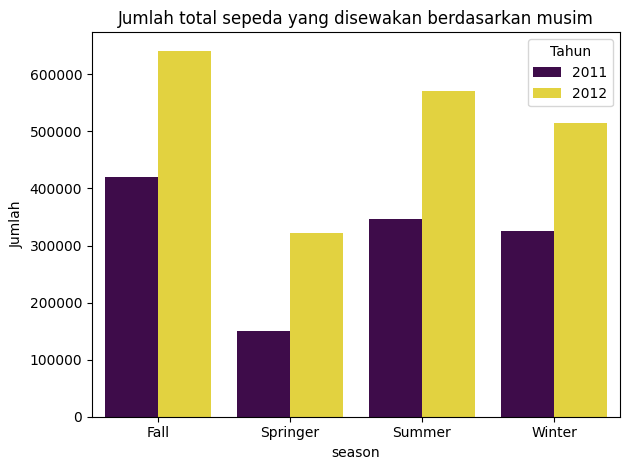

In [43]:
season_counts = day_df.groupby(by=["season", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.barplot(data=season_counts, x="season", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan musim")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

### Pertanyaan 6: Bagaimana efek cuaca terhadap jumlah total penyewaan sepeda ?

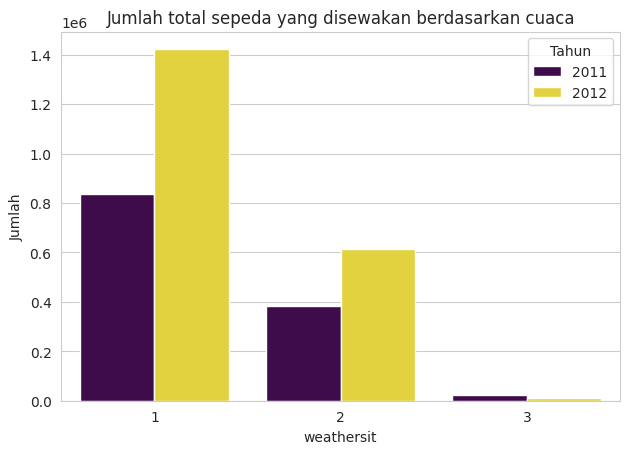

In [ ]:
weather_counts = day_df.groupby(by=["weathersit", "yr"]).agg({
    "cnt": "sum"
}).reset_index()


sns.barplot(data=weather_counts, x="weathersit", y="cnt", hue="yr", palette="viridis")
plt.ylabel("Jumlah")
plt.title("Jumlah total sepeda yang disewakan berdasarkan cuaca")
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

### Pertanyaan 7: Bagaimana Distribusi penyewaan per Musim dan Cuaca?

In [ ]:
# Buat subplot dengan 1 baris 2 kolom
plt.figure(figsize=(15, 6))

# Plot 1: Distribusi berdasarkan Musim
plt.subplot(1, 2, 1)
season_dist = day_df.groupby('season')['cnt'].sum()
plt.pie(season_dist,
        labels=['Winter', 'Spring', 'Summer', 'Fall'],
        autopct='%1.1f%%',
        colors=sns.color_palette("husl", 4))
plt.title('Distribusi Penyewaan per Musim')

# Plot 2: Distribusi berdasarkan Cuaca
plt.subplot(1, 2, 2)
weather_dist = day_df.groupby('weathersit')['cnt'].sum()
plt.pie(weather_dist,
        labels=['Clear', 'Mist', 'Light Rain/Snow'],
        autopct='%1.1f%%',
        colors=sns.color_palette("husl", 3))
plt.title('Distribusi Penyewaan per Kondisi Cuaca')

# Tampilkan plot
plt.tight_layout()
plt.show()

# Tampilkan keterangan
print("\nKeterangan Musim:")
print("Winter : Musim Dingin")
print("Spring : Musim Semi")
print("Summer : Musim Panas")
print("Fall   : Musim Gugur")
print("\nKeterangan Cuaca:")
print("Clear          : Cerah, Berawan Sebagian")
print("Mist          : Berkabut, Berawan")
print("Light Rain/Snow: Hujan Ringan/Salju Ringan")

### Pertanyaan 8: Faktor lingkungan apa saja yang dapat mempengaruhi jumlah penyewaan sepeda gunakan regresi dalam menganalisis hubungan?

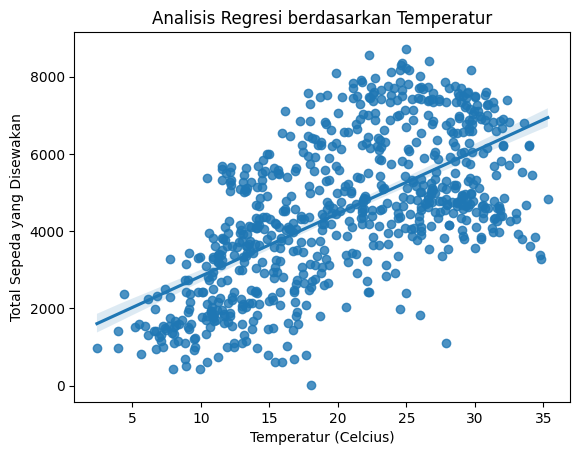

In [ ]:
sns.regplot(x=day_df["temp"], y=day_df["cnt"])
plt.title("Analisis Regresi berdasarkan Temperatur")
plt.xlabel("Temperatur (Celcius)")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

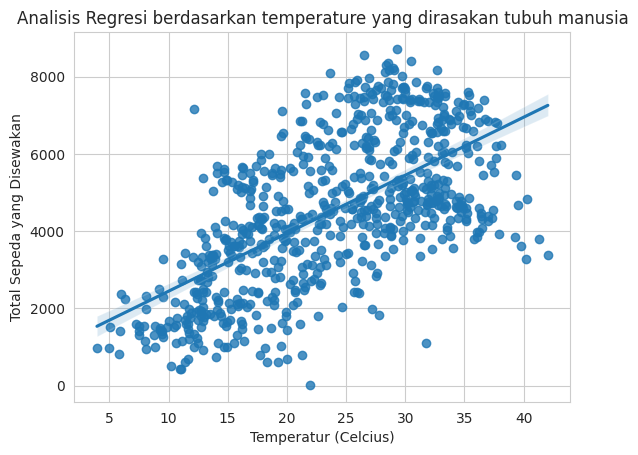

In [ ]:
sns.regplot(x=day_df["atemp"], y=day_df["cnt"])
plt.title("Analisis Regresi berdasarkan temperature yang dirasakan tubuh manusia")
plt.xlabel("Temperatur (Celcius)")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

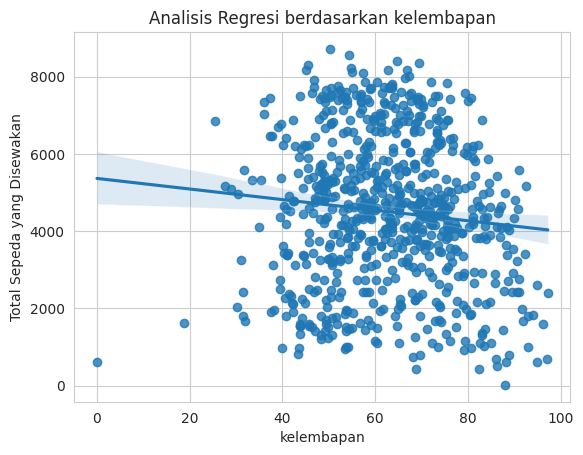

In [ ]:
sns.regplot(x=day_df["hum"], y=day_df["cnt"])
plt.title("Analisis Regresi berdasarkan kelembapan")
plt.xlabel("kelembapan")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

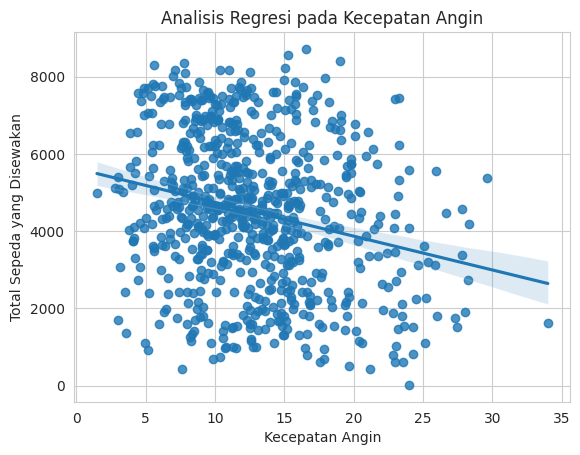

In [ ]:
sns.regplot(x=day_df["windspeed"], y=day_df["cnt"])
plt.title("Analisis Regresi pada Kecepatan Angin")
plt.xlabel("Kecepatan Angin")
plt.ylabel("Total Sepeda yang Disewakan")
plt.show()

## Conclusion

- Visualisasi data menunjukkan bahwa jumlah pengguna baru lebih banyak dibandingkan dengan pengguna casual pada tahun 2011 dan 2012. Pada 2012, perbedaan antara keduanya mencapai 1.304.046, dengan tren penyewaan sepeda tertinggi dimiliki oleh pengguna baru.

- Berdasarkan analisis pada kolom mnth di dataframe day_df, bulan September 2012 tercatat sebagai bulan dengan penyewaan sepeda terbanyak, sementara pada 2011, Juni mencatatkan jumlah penyewaan tertinggi.

- Data pada dataframe day_df menunjukkan bahwa penyewaan sepeda lebih tinggi pada hari biasa dibandingkan dengan hari libur, baik pada 2011 maupun 2012, menandakan bahwa hari biasa mempengaruhi frekuensi penyewaan.

- Grafik dari analisis dataframe hour_df pada kolom hour menunjukkan bahwa penyewaan sepeda terbanyak terjadi pada pukul 17.00, meskipun pada pagi hari, tepatnya pukul 08.00, juga tercatat jumlah penyewaan yang signifikan meski tidak sebanyak sore hari.

- Berdasarkan analisis kolom season dan yr pada dataframe day_df, penyewaan sepeda tertinggi terjadi pada musim gugur (Fall), sementara yang terendah terjadi pada musim semi (spring) di tahun 2011 dan 2012.

- Analisis pada kolom weathersit dan yr di dataframe day_df menunjukkan bahwa cuaca dengan kondisi nomor 1 (Clear, Few clouds, Partly cloudy) menghasilkan jumlah penyewaan sepeda terbanyak, sedangkan cuaca nomor 3 (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) menghasilkan jumlah penyewaan sepeda paling sedikit.

- Distribusi secara total tahun 2011 dan 2012 menunjukkan penyewaan paling banyak pada musim dingin (Winter) dengan persentase 32.2% dan paling rendah pada musim semi (Spring) dengan persentase 14.3%. Sedangkan distribusi secara total berdasarkan cuaca menunjukkan penyewaan terbanyak pada cuaca cerah (Clear) dengan persentase 68.6% dan penyewaan paling sedikit pada cuaca hujan ringan (Light Rain/Snow)

- Berdasarkan dataframe day_df, suhu (temperature) dan jumlah penyewaan sepeda memiliki hubungan positif. Begitu juga dengan suhu tubuh yang dirasakan (atemp), yang juga berhubungan positif dengan penggunaan sepeda. Kelembapan (hum) berpengaruh pada rentang 40-85%, sementara kecepatan angin (windspeed) mempengaruhi penyewaan sepeda pada rentang 3-20 km/jam.

## Export Dataset
Mengexport dataset yang telah dibersihkan pada proses diatas untuk digunakan pada Streamlit

In [ ]:
day_df.to_csv("bike_day.csv", index=False)